In [89]:
# Dependencies and Setup mike
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as sts
from scipy.stats import linregress

# Import API key
# from api_key import g_key

In [2]:
# Name of the CSV file
top_20 = "Resources/top_20_ca_wildfires.csv"
ca_rainfall_df = "Resources/ca_rainfall_df.csv"

In [3]:
# read the CSV in pandas
top_20 = pd.read_csv(top_20)
top_20

,index,fire_name,cause,month,year,county,acres,structures,deaths
0,0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2


In [4]:
index = top_20["index"]
fire_name = top_20["fire_name"]
cause = top_20["cause"]
month = top_20["month"]
year = top_20["year"]
county = top_20["county"]
acres = top_20["acres"]
structures = top_20["structures"]
deaths = top_20["deaths"]

In [5]:
# Rename column year 
summary_top20_df = pd.DataFrame({"Index": index, "Fire Name": fire_name, "Cause": cause, "Month": month, 
                                 "Year": year, "County": county, "Acres": acres, 
                                 "Structures": structures, "Deaths": deaths})

summary_top20_df

,Index,Fire Name,Cause,Month,Year,County,Acres,Structures,Deaths
0,0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2


In [6]:
# read the CSV in pandas
ca_rainfall_df = pd.read_csv(ca_rainfall_df)
ca_rainfall_df

,Index,County,Month,Year,Rainfall (in)
0,0,Colusa,July,2018,0.00
1,1,Ventura,December,2017,0.01
2,2,San Diego,October,2003,0.01
3,3,Lassen,August,2012,0.05
4,4,Tuolumne,August,2013,0.10
5,5,Butte,November,2018,6.08
6,6,Fresno,July,2015,0.56
7,7,Tulare,July,2002,0.01
8,8,Tuolumne,August,1987,0.03
9,9,Trinity,August,1999,0.32


In [7]:
#Merge on year
merge_df = pd.merge(summary_top20_df, ca_rainfall_df, on="Index", left_index=True)
merge_df

,Index,Fire Name,Cause,Month_x,Year_x,County_x,Acres,Structures,Deaths,County_y,Month_y,Year_y,Rainfall (in)
0,0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1,Colusa,July,2018,0.00
1,1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2,Ventura,December,2017,0.01
2,2,Cedar,Human Related,October,2003,San Diego,273246,2820,15,San Diego,October,2003,0.01
3,3,Rush,Lightning,August,2012,Lassen,271911,0,0,Lassen,August,2012,0.05
4,4,Rim,Human Related,August,2013,Tuolumne,257314,112,0,Tuolumne,August,2013,0.10
5,5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0,Butte,November,2018,6.08
6,6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8,Fresno,July,2015,0.56
7,7,Matilija,Undetermined,September,1932,Ventura,220000,0,0,Tulare,July,2002,0.01
8,8,Witch,Powerlines,October,2007,San Diego,197990,1650,2,Tuolumne,August,1987,0.03
9,9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2,Trinity,August,1999,0.32


In [8]:
merge_drop_df = merge_df.drop(['County_x','Month_x', 'Year_x'], axis = 1) 
merge_drop_df

,Index,Fire Name,Cause,Acres,Structures,Deaths,County_y,Month_y,Year_y,Rainfall (in)
0,0,Mendocino Complex,Under Investigation,459123,280,1,Colusa,July,2018,0.00
1,1,Thomas,Powerlines,281893,1063,2,Ventura,December,2017,0.01
2,2,Cedar,Human Related,273246,2820,15,San Diego,October,2003,0.01
3,3,Rush,Lightning,271911,0,0,Lassen,August,2012,0.05
4,4,Rim,Human Related,257314,112,0,Tuolumne,August,2013,0.10
5,5,Zaca,Human Related,240207,1,0,Butte,November,2018,6.08
6,6,Carr,Human Related,229651,1614,8,Fresno,July,2015,0.56
7,7,Matilija,Undetermined,220000,0,0,Tulare,July,2002,0.01
8,8,Witch,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03
9,9,Klamath Theater Complex,Lightning,192038,0,2,Trinity,August,1999,0.32


In [47]:
# rename
final_df = merge_drop_df.rename(columns={"County_y": "County", "Month_y": "Month", "Year_y": "Year"})
final_df

,Index,Fire Name,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
0,0,Mendocino Complex,Under Investigation,459123,280,1,Colusa,July,2018,0.00
1,1,Thomas,Powerlines,281893,1063,2,Ventura,December,2017,0.01
2,2,Cedar,Human Related,273246,2820,15,San Diego,October,2003,0.01
3,3,Rush,Lightning,271911,0,0,Lassen,August,2012,0.05
4,4,Rim,Human Related,257314,112,0,Tuolumne,August,2013,0.10
5,5,Zaca,Human Related,240207,1,0,Butte,November,2018,6.08
6,6,Carr,Human Related,229651,1614,8,Fresno,July,2015,0.56
7,7,Matilija,Undetermined,220000,0,0,Tulare,July,2002,0.01
8,8,Witch,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03
9,9,Klamath Theater Complex,Lightning,192038,0,2,Trinity,August,1999,0.32


In [10]:
# create output csv
final_df.to_csv("Resources/final_df.csv")

In [ ]:
# Is there a correlation between total amount of rainfall in a specific area and the total number of wildfires?

In [ ]:
# Is there a correlation between total number of acres burned and rainfall?

In [91]:
# Is there a correlation between the number of structures affected and rainfall due to wildfires?? 
# Is there a higher number of structures affected due to the lack of rainfall?
# Summary Stats
mean_numpy = np.mean(final_df["Structures"])
print(f"The mean Structures burned is {mean_numpy}")
median_numpy = np.median(final_df["Structures"])
print(f"The median Structures burned is {median_numpy}")
mode_scipy = sts.mode(final_df["Structures"])
print(f"The mode Structures burned is {mode_scipy}")
print("----------------------------------------")
mean_numpy = np.mean(final_df["Rainfall (in)"])
print(f"The mean Rainfall (in) is {mean_numpy}")
median_numpy = np.median(final_df["Rainfall (in)"])
print(f"The median Rainfall (in) is {median_numpy}")
mode_scipy = sts.mode(final_df["Rainfall (in)"])
print(f"The mode Rainfall (in) is {mode_scipy}")

The mean Structures burned is 1352.65
The median Structures burned is 43.0
The mode Structures burned is ModeResult(mode=array([0]), count=array([5]))
----------------------------------------
The mean Rainfall (in) is 0.402
The median Rainfall (in) is 0.02
The mode Rainfall (in) is ModeResult(mode=array([0.01]), count=array([6]))


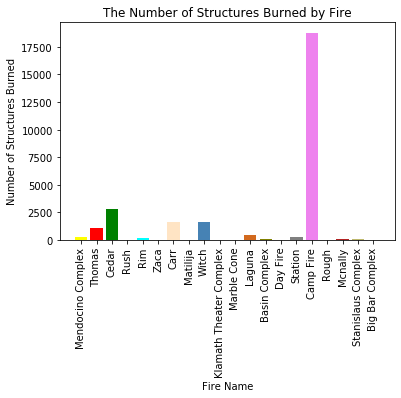

<Figure size 432x288 with 0 Axes>

In [82]:
# Is there a correlation between the number of structures affected and rainfall due to wildfires?? 
# Is there a higher number of structures affected due to the lack of rainfall?

# Create a bar chart based upon the above data
Fire_Name = final_df["Fire Name"]
Structures = final_df["Structures"]
x_axis = Fire_Name
y_axis = Structures
plt.bar(x_axis, y_axis, color=['yellow', 'red', 'green', 'blue', 'cyan', 'gold', 'bisque', 'mediumpurple', 'steelblue',
'pink', 'lawngreen', 'chocolate', 'olive', 'darkgoldenrod', 'gray', 'violet', 'slategray', 'firebrick', 'darkkhaki'], 
align="center")
plt.xticks(rotation=90)
plt.title("The Number of Structures Burned by Fire")
plt.xlabel("Fire Name")
plt.ylabel("Number of Structures Burned")
plt.show()
plt.savefig("Resources/structures burned(bar chart).png")

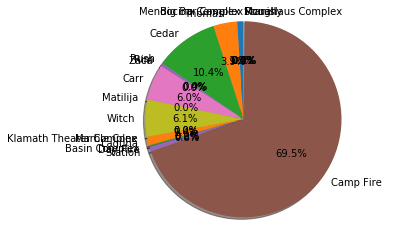

<Figure size 432x288 with 0 Axes>

In [83]:
# Tell matplotlib to create a pie chart based upon the above data
fire_name = final_df["Fire Name"]
structures_burned = final_df["Structures"]
plt.pie(structures_burned, labels=fire_name,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()
plt.savefig("Resources/structures burned(pie chart).png")

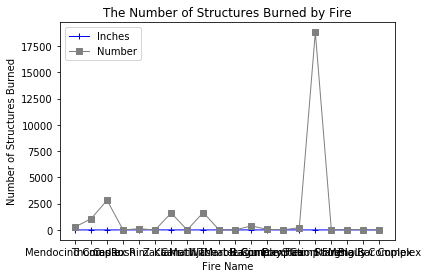

<Figure size 432x288 with 0 Axes>

In [84]:
# Create a line plot looking at the rainfall and the number of structures burned
x_axis = final_df["Fire Name"]
Rainfall = final_df["Rainfall (in)"]
Structures = final_df["Structures"]
rainfall, = plt.plot(x_axis, Rainfall, marker="+", color="blue", linewidth=1, label = "Inches")
structures, = plt.plot(x_axis, Structures, marker="s", color="gray", linewidth=1, label = "Number")
plt.legend(handles=[rainfall, structures], loc="best")
plt.xlabel("Fire Name")
plt.ylabel("Number of Structures Burned")
plt.title("The Number of Structures Burned by Fire")
plt.show()
plt.savefig("Resources/structures burned(line plot).png")

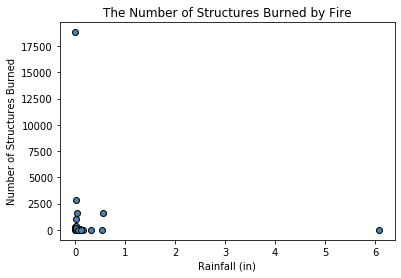

<Figure size 432x288 with 0 Axes>

In [85]:
# Create a scatter plot with Rainfall vs. Number of Structures Burned
Rainfall = final_df["Rainfall (in)"]
Structures = final_df["Structures"]
plt.scatter(Rainfall, Structures, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("The Number of Structures Burned by Fire")
plt.xlabel("Rainfall (in)")
plt.ylabel("Number of Structures Burned")

# plt.savefig("../output_data/City Latitude vs Max Temperature.png")
# plt.savefig("output_data/fig1.png")

plt.show()

plt.savefig("Resources/structures burned(scatter plot).png")

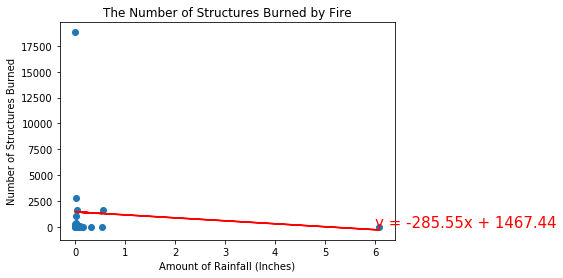

The correlation coefficient between Amount of Rainfall (in) and Number of Structures Burned is -0.09
The r-squared is: 0.008476675390245382


<Figure size 432x288 with 0 Axes>

In [86]:
# Create a scatter plot looking at the correlation between rainfall and structures burned
x_values = final_df["Rainfall (in)"]
y_values = final_df["Structures"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("The Number of Structures Burned by Fire")
plt.xlabel("Amount of Rainfall (Inches)")
plt.ylabel("Number of Structures Burned")
plt.show()

# Calculate the correlation coefficient between Amount of Rainfall and Number of Structures Burned
print(f"The correlation coefficient between Amount of Rainfall (in) and Number of Structures Burned is {round(st.pearsonr(Rainfall,Structures)[0],2)}")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Resources/structures burned(correlation 2).png")

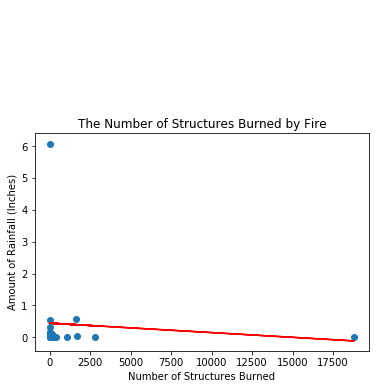

The correlation coefficient between Amount of Rainfall (in) and Number of Structures Burned is -0.09
The r-squared is: 0.008476675390245382


<Figure size 432x288 with 0 Axes>

In [87]:
# Create a scatter plot looking at the correlation between rainfall and structures burned
x_values = final_df["Structures"]
y_values = final_df["Rainfall (in)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("The Number of Structures Burned by Fire")
plt.xlabel("Number of Structures Burned")
plt.ylabel("Amount of Rainfall (Inches)")
plt.show()

# Calculate the correlation coefficient between Amount of Rainfall and Number of Structures Burned
print(f"The correlation coefficient between Amount of Rainfall (in) and Number of Structures Burned is {round(st.pearsonr(Rainfall,Structures)[0],2)}")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Resources/structures burned(correlation).png")

In [59]:
# Is there a correlation between the number of deaths and rainfall due to wildfires? 
# Are the numbers of deaths caused by wildfires correlated with rainfall?